# 1. Collecting a Dataset
Split randomly your dataset into training, validation, and test sets: Use a 60/20/20 ratio

In [2]:
import flowers_create_dataset

Image types: ['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']
2595
865
866


This is run so that I won't show any unecessary warnings

In [10]:
import warnings  
with warnings.catch_warnings():  
    warnings.filterwarnings("ignore",category=FutureWarning)
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.preprocessing.text import Tokenizer
    import tensorflow.python.util.deprecation as deprecation
    deprecation._PRINT_DEPRECATION_WARNINGS = False

# 2. Building a Simple Convolutional Neural Network

In [11]:
from keras import layers 
from keras import models

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) # I added this layer to prevent overfitting
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(5, activation='softmax')) # I use softmax since the loss is 'categorical_crossentropy'

from keras import optimizers

model.compile(optimizer='rmsprop',
              #optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# This is the directory where the training and validation data is stored
train_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/train'
validation_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/validation'
test_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle = False, # I added this
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')


Found 2593 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('TRAIN: data batch shape:', data_batch.shape)
    print('TRAIN: labels batch shape:', labels_batch.shape)
    break
    
for data_batch, labels_batch in validation_generator:
    print('VALIDATION: data batch shape:', data_batch.shape)
    print('VALIDATION: labels batch shape:', labels_batch.shape)
    break

TRAIN: data batch shape: (20, 150, 150, 3)
TRAIN: labels batch shape: (20, 5)
VALIDATION: data batch shape: (20, 150, 150, 3)
VALIDATION: labels batch shape: (20, 5)


### Building the model

### 5.8 Fitting the model using a batch generator

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=130, # 2593 (nbr of images) / 20 (batch size)
      epochs=15,
      validation_data=validation_generator,
      validation_steps=44) # 865 (nbr of images) / 20 (batch size)

Epoch 1/15
130/130 [==============================] - 100s 766ms/step - loss: 1.3922 - acc: 0.3972 - val_loss: 1.2089 - val_acc: 0.4902
Epoch 2/15
130/130 [==============================] - 100s 769ms/step - loss: 1.0990 - acc: 0.5607 - val_loss: 0.9850 - val_acc: 0.5977
Epoch 3/15
130/130 [==============================] - 106s 816ms/step - loss: 0.9857 - acc: 0.6139 - val_loss: 1.2656 - val_acc: 0.5214
Epoch 4/15
130/130 [==============================] - 102s 788ms/step - loss: 0.8924 - acc: 0.6548 - val_loss: 1.0171 - val_acc: 0.6277
Epoch 5/15
130/130 [==============================] - 103s 795ms/step - loss: 0.8207 - acc: 0.7009 - val_loss: 1.0058 - val_acc: 0.6243
Epoch 6/15
130/130 [==============================] - 92s 709ms/step - loss: 0.7725 - acc: 0.7144 - val_loss: 0.8639 - val_acc: 0.6590
Epoch 7/15
130/130 [==============================] - 92s 708ms/step - loss: 0.6735 - acc: 0.7517 - val_loss: 0.8017 - val_acc: 0.6913
Epoch 8/15
130/130 [==============================

### 5.9 Saving the model

In [16]:
model.save('flower_categorizer_model_1.h5')

### 5.10 Displaying curves of loss and accuracy during training

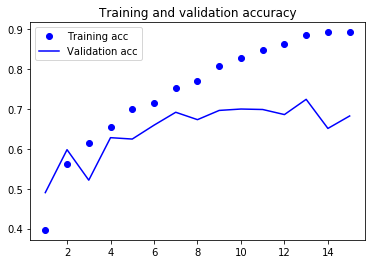

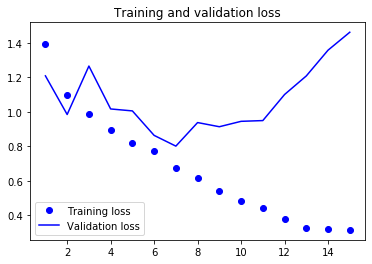

In [17]:
import matplotlib.pyplot as plt
from keras.models import load_model

# Needed to do this for the kernel to stop crashing
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#model = load_model('flower_categorizer_model_1.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.savefig('Part_2_Accuracy.png')

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.savefig('Part_2_Loss.png')

### Writing the confusion matrix


In [32]:
import numpy as np

y_true = test_generator.classes
y_pred = np.argmax(model.predict_generator(test_generator,
                                 steps = 44,
                                 #max_queue_size=10, 
                                 #workers=1, 
                                 #use_multiprocessing=False, 
                                 verbose=1)
                   ,axis = 1)

from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_true, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_true, y_pred))

Classification report for classifier <keras.engine.sequential.Sequential object at 0x645364128>:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       175
           1       0.73      0.85      0.78       203
           2       0.78      0.41      0.54       158
           3       0.70      0.85      0.77       140
           4       0.63      0.72      0.67       189

    accuracy                           0.71       865
   macro avg       0.72      0.71      0.70       865
weighted avg       0.72      0.71      0.70       865


Confusion matrix:
[[122  22   3  13  15]
 [ 13 172   0  10   8]
 [ 18  12  65   7  56]
 [  1  16   2 119   2]
 [  6  14  13  20 136]]


# 3. Using Image Augmentation
Here I create my model once again.

In [38]:
from keras import layers 
from keras import models

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) # I added this layer to prevent overfitting
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(5, activation='softmax')) # I use softmax since the loss is 'categorical_crossentropy'

from keras import optimizers

model.compile(optimizer='rmsprop',
              #optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

I now augment my training data (not my test or validation data)

In [39]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( # Here's the image augmentation.
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# This is the directory where the training and validation data is stored
train_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/train'
validation_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/validation'
test_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle = False,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=130, # 2593 (nbr of images) / 20 (batch size)
      epochs=15,
      validation_data=validation_generator,
      validation_steps=44) # 865 (nbr of images) / 20 (batch size)


Found 2593 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Epoch 1/15
130/130 [==============================] - 98s 757ms/step - loss: 1.4642 - acc: 0.3908 - val_loss: 1.3582 - val_acc: 0.3977
Epoch 2/15
130/130 [==============================] - 101s 774ms/step - loss: 1.1640 - acc: 0.5247 - val_loss: 1.2458 - val_acc: 0.5526
Epoch 3/15
130/130 [==============================] - 102s 787ms/step - loss: 1.0553 - acc: 0.5836 - val_loss: 1.0631 - val_acc: 0.5699
Epoch 4/15
130/130 [==============================] - 102s 785ms/step - loss: 1.0018 - acc: 0.6153 - val_loss: 1.0299 - val_acc: 0.5827
Epoch 5/15
130/130 [==============================] - 94s 722ms/step - loss: 0.9400 - acc: 0.6376 - val_loss: 1.3933 - val_acc: 0.5353
Epoch 6/15
130/130 [==============================] - 99s 759ms/step - loss: 0.9225 - acc: 0.6462 - val_loss: 1.3998 - val_acc: 0.5283
Epoch 7/15
130/130 [==============================] - 95s 730ms

I now save the model

In [40]:
model.save('flower_categorizer_model_2.h5')

Here I plot it

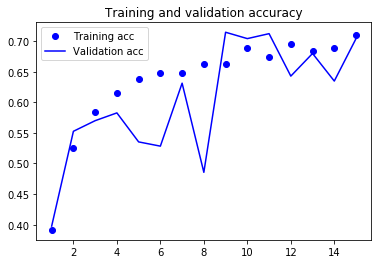

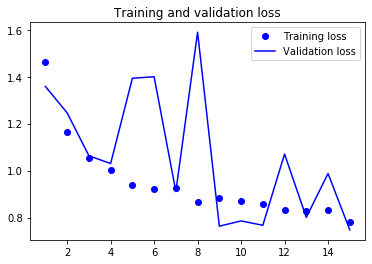

In [41]:
import matplotlib.pyplot as plt
from keras.models import load_model

# Needed to do this for the kernel to stop crashing
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#model = load_model('flower_categorizer_model_1.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Writing the confusion matrix

In [42]:
import numpy as np

y_true = test_generator.classes
y_pred = np.argmax(model.predict_generator(test_generator,
                                 steps = 44,
                                 #max_queue_size=10, 
                                 #workers=1, 
                                 #use_multiprocessing=False, 
                                 verbose=1)
                   ,axis = 1)

from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_true, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_true, y_pred))

44/44 [==============================] - 13s 296ms/step
Classification report for classifier <keras.engine.sequential.Sequential object at 0x644b1c828>:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       175
           1       0.74      0.88      0.80       203
           2       0.81      0.34      0.48       158
           3       0.82      0.83      0.82       140
           4       0.63      0.89      0.74       189

    accuracy                           0.75       865
   macro avg       0.78      0.74      0.73       865
weighted avg       0.77      0.75      0.74       865


Confusion matrix:
[[133  24   5   6   7]
 [  4 178   0  13   8]
 [  7  15  54   4  78]
 [  1  12   3 116   8]
 [  1  11   5   3 169]]


# 4. Using a Pretrained Convolutional Base

VGG16 is one of Keras' pretrained conv-bases. It's pretrained on the ImageNet dataset.

In [76]:
from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))



87916544/87910968 [==============================] - 66s 1us/step


In [77]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_17[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_18 

## FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION

### Listing 5.17 Extracting features using the pretrained convolutional base

In [96]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# This is the directory where the training and validation data is stored
train_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/train'
validation_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/validation'
test_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/test'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 2048))
    labels = np.zeros(shape=(sample_count, 5)) # Needed to add the 5
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical') # I changed this
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2593)
validation_features, validation_labels = extract_features(validation_dir, 865)
test_features, test_labels = extract_features(test_dir, 865)
print('success')
print(validation_labels.shape)

Found 2593 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
success
(865, 5)


Here I reshape the features

In [101]:
train_features = np.reshape(train_features, (2593, 3 * 3 * 2048))
validation_features = np.reshape(validation_features, (865, 3 * 3 * 2048))
test_features = np.reshape(test_features, (865, 3 * 3 * 2048))
print('done')

done


In [103]:
print(validation_labels.shape)
print(validation_features.shape)

(865, 5)
(865, 18432)


### Listing 5.18 Defining and training the densely connected classifier

In [104]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax')) # I changed this to softmax from sigmoid

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

# I added this to try and fix an error
#from keras.utils import to_categorical
#train_labels = to_categorical(train_labels)
#validation_labels = to_categorical(validation_labels)

history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2593 samples, validate on 865 samples
Epoch 1/20
2593/2593 [==============================] - 23s 9ms/step - loss: 1.3086 - acc: 0.5519 - val_loss: 0.7159 - val_acc: 0.7410
Epoch 2/20
2593/2593 [==============================] - 17s 6ms/step - loss: 0.7806 - acc: 0.7131 - val_loss: 0.6355 - val_acc: 0.7595
Epoch 3/20
2593/2593 [==============================] - 17s 7ms/step - loss: 0.6046 - acc: 0.7848 - val_loss: 0.5737 - val_acc: 0.8035
Epoch 4/20
2593/2593 [==============================] - 17s 7ms/step - loss: 0.5087 - acc: 0.8214 - val_loss: 0.5687 - val_acc: 0.7977
Epoch 5/20
2593/2593 [==============================] - 17s 7ms/step - loss: 0.4074 - acc: 0.8650 - val_loss: 0.5575 - val_acc: 0.8081
Epoch 6/20
2593/2593 [==============================] - 17s 7ms/step - loss: 0.3459 - acc: 0.8797 - val_loss: 0.5469 - val_acc: 0.8058
Epoch 7/20
2593/2593 [==============================] - 17s 7ms/step - loss: 0.2993 - acc: 0.9001 - val_loss: 0.5360 - val_acc: 0.8150
Epoch 8/

Here I'm plotting

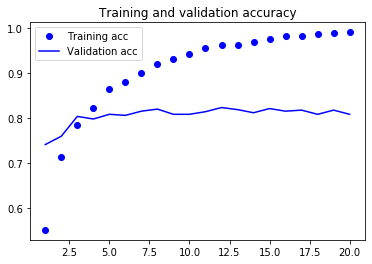

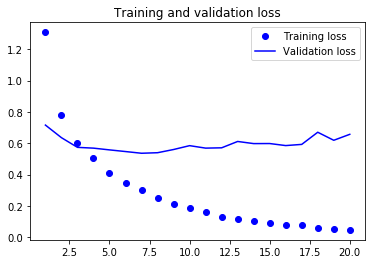

In [105]:
import matplotlib.pyplot as plt
from keras.models import load_model

# Needed to do this for the kernel to stop crashing
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#model = load_model('flower_categorizer_model_1.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

report the training and validation losses and accuracies

In [107]:
import numpy as np

y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_features, verbose=1),axis = 1)

from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_true, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_true, y_pred))

865/865 [==============================] - 2s 3ms/step
Classification report for classifier <keras.engine.sequential.Sequential object at 0x1acd7bd278>:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       175
           1       0.91      0.89      0.90       203
           2       0.87      0.74      0.80       158
           3       0.84      0.88      0.86       140
           4       0.78      0.86      0.82       189

    accuracy                           0.85       865
   macro avg       0.85      0.85      0.85       865
weighted avg       0.85      0.85      0.85       865


Confusion matrix:
[[153   5   2   5  10]
 [ 11 181   2   4   5]
 [  5   2 117   7  27]
 [  3   6   4 123   4]
 [  5   5   9   7 163]]


## FEATURE EXTRACTION WITH DATA AUGMENTATION

In [115]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax')) # I changed this to softmax and 5

In [116]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_7 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               4718848   
_________________________________________________________________
dense_42 (Dense)             (None, 5)                 1285      
Total params: 26,522,917
Trainable params: 4,720,133
Non-trainable params: 21,802,784
_________________________________________________________________


In [122]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 192


In [123]:
conv_base.trainable = False

In [124]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [126]:
from keras.preprocessing.image import ImageDataGenerator

# This is the directory where the training and validation data is stored
train_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/train'
validation_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/validation'
test_dir = '/Users/Marcel/Documents/Python/edan95/project_3/flowers_dataset/flowers/flowers_split/test'


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=130,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=44,
      verbose=1)

Found 2593 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Epoch 1/15
130/130 [==============================] - 236s 2s/step - loss: 0.8877 - acc: 0.6784 - val_loss: 1.8517 - val_acc: 0.5584
Epoch 2/15
130/130 [==============================] - 211s 2s/step - loss: 0.8195 - acc: 0.7049 - val_loss: 2.5216 - val_acc: 0.4948
Epoch 3/15
130/130 [==============================] - 212s 2s/step - loss: 0.8454 - acc: 0.6876 - val_loss: 2.5342 - val_acc: 0.5410
Epoch 4/15
130/130 [==============================] - 200s 2s/step - loss: 0.7906 - acc: 0.7147 - val_loss: 1.9053 - val_acc: 0.6046
Epoch 5/15
130/130 [==============================] - 215s 2s/step - loss: 0.7757 - acc: 0.7234 - val_loss: 1.7387 - val_acc: 0.6312
Epoch 6/15
130/130 [==============================] - 238s 2s/step - loss: 0.7463 - acc: 0.7200 - val_loss: 1.6924 - val_acc: 0.6393
Epoch 7/15
130/130 [==============================] - 509s 4s/step - loss: 0.7351 - acc: 0.7330 - val_loss: 1.5952 - va

Here I'm plotting

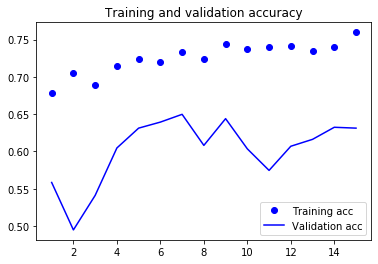

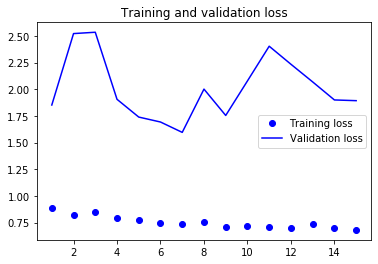

In [132]:
import matplotlib.pyplot as plt
from keras.models import load_model

# Needed to do this for the kernel to stop crashing
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#model = load_model('flower_categorizer_model_1.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [134]:
import numpy as np

y_true = test_generator.classes
y_pred = np.argmax(model.predict_generator(test_generator,
                                 steps = 44,
                                 #max_queue_size=10, 
                                 #workers=1, 
                                 #use_multiprocessing=False, 
                                 verbose=1)
                   ,axis = 1)

from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_true, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_true, y_pred))

44/44 [==============================] - 47s 1s/step
Classification report for classifier <keras.engine.sequential.Sequential object at 0x1aa88b3a90>:
              precision    recall  f1-score   support

           0       0.19      0.37      0.25       175
           1       0.03      0.02      0.03       203
           2       0.00      0.00      0.00       158
           3       0.12      0.08      0.10       140
           4       0.19      0.20      0.20       189

    accuracy                           0.14       865
   macro avg       0.11      0.13      0.11       865
weighted avg       0.11      0.14      0.12       865


Confusion matrix:
[[ 64  18  10  59  24]
 [ 57   5   5   7 129]
 [139  15   0   1   3]
 [ 47  78   0  11   4]
 [ 32  34  73  12  38]]
